# Plot Sea Ice Anomaly Hovmoller

An example of loading Northern Hemisphere sea ice concentration and plotting a hovmoller of anomalies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import apbplotlib.myplot as apbplt

Monthly sea ice extent data are from the NSIDC Sea Ice Index.  These data can be accessed directly using pandas by passing a url to the ftp.  __Annoyingly__, the data are in an Excel spreadsheet.  However, if you have the `xlrd` module installed, you can use `pandas.read_excel`.  Accessing the data directly means that you do not have to update a local file of sea ice extent.

_Any data on an anonymous ftp can be accessed directly by `pandas`_

___Excel is not a good way to store data.___  _I do not consider `.xlsx` files machine readable or good data practice.  Firstly, the `.xlsx` format require proprietary software to read it.  There is no good way to explore the data without first loading it into Excel.  A workbook with multiple worksheets is difficult to read.  It is too easy to change values, and very difficult to keep track of those changes, even if you are aware you or someone else has made them.  It is also difficult to know how cell values are calculated.  If you have ever tried to understand a cell equation, then you should be aware of this problem.  There are many other issues._

In [2]:
url = "ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Monthly_Data_by_Year_G02135_v3.0.xlsx"
df = pd.read_excel(url, index_col=0, usecols='A:M')
df.head()

,January,February,March,April,May,June,July,August,September,October,November,December
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.645,13.667
1979,15.414,16.175,16.342,15.447,13.857,12.530,10.311,8.041,7.051,8.748,10.943,13.336
1980,14.862,15.955,16.041,15.429,13.793,12.205,10.100,7.984,7.667,9.183,11.383,13.593
1981,14.910,15.604,15.632,15.010,13.802,12.430,10.271,7.844,7.138,8.856,10.929,13.341
1982,15.177,15.974,16.044,15.466,13.973,12.476,10.367,8.139,7.302,9.421,11.627,13.642


Standardized anomalies can be calculated in a number of ways.  A succinct way that is also transparent is to use the `transform` method.  The `transform` method transforms columns of a Dataframe using a function.  Here, I define a function `standardized_anomaly`.  `pandas` has a builtin `standardized_anomaly` function but it uses all rows, not a subset of rows that we want for a climatological standardized anomaly.  The keyword arguments `start_year` and `end_year` for the function can be passed in the call to `transform`. 

In [8]:
def standardized_anomaly(x, start_year=1981, end_year=2010):
    '''Calculate standardized climate anomalies for each month'''
    return (x - x.loc[start_year: end_year].mean(axis=0, skipna=True)) / x.loc[start_year: end_year].std(axis=0, skipna=True)

climate_period_start = 1981
climate_period_end = 2010
df_stdanom = df.transform(standardized_anomaly, axis=0, start_year=climate_period_start, end_year=climate_period_end)
df_stdanom.head(10)

,January,February,March,April,May,June,July,August,September,October,November,December
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.649897,1.655906
1979,2.155082,1.912448,2.158774,1.742473,1.450120,1.615529,1.198034,1.120964,0.731155,0.482186,0.423177,0.993474
1980,0.957257,1.431054,1.448050,1.701117,1.287613,0.930000,0.897814,1.045408,1.436877,1.006650,1.192061,1.507809
1981,1.061416,0.663011,0.482316,0.738437,1.310466,1.404597,1.141120,0.859833,0.830827,0.612398,0.398713,1.003481
1982,1.640799,1.472629,1.455134,1.786127,1.744664,1.501626,1.277713,1.250866,1.018714,1.293599,1.618442,1.605873
1983,1.130855,1.542650,1.551943,1.110643,0.520784,1.121948,1.566550,1.313167,1.125260,1.188706,1.328363,0.919426
1984,0.113138,-0.004376,0.368978,0.749925,0.739153,0.818206,0.722804,0.763068,0.449325,0.256726,0.246684,0.299022
1985,0.659971,0.361046,1.082063,1.535693,1.998581,0.959530,0.391282,0.273945,0.326740,0.238641,0.566469,0.421102
1986,1.018017,1.059067,1.138732,0.851018,0.236397,0.446965,0.963265,1.038780,1.143590,1.369555,1.314384,0.765326
1987,1.191614,1.638928,0.916778,1.200248,1.160655,1.522719,1.229336,0.573516,0.992364,0.845091,0.914215,NaN


The alternative breaks down the steps.

In [9]:
xmean = df.loc[climate_period_start: climate_period_end, :].mean(axis=0, skipna=True)
xstd = df.loc[climate_period_start: climate_period_end, :].std(axis=0, skipna=True)
df_stdanom_alt = (df - xmean) / xstd
df_stdanom_alt.head(10)

,January,February,March,April,May,June,July,August,September,October,November,December
1978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.649897,1.655906
1979,2.155082,1.912448,2.158774,1.742473,1.450120,1.615529,1.198034,1.120964,0.731155,0.482186,0.423177,0.993474
1980,0.957257,1.431054,1.448050,1.701117,1.287613,0.930000,0.897814,1.045408,1.436877,1.006650,1.192061,1.507809
1981,1.061416,0.663011,0.482316,0.738437,1.310466,1.404597,1.141120,0.859833,0.830827,0.612398,0.398713,1.003481
1982,1.640799,1.472629,1.455134,1.786127,1.744664,1.501626,1.277713,1.250866,1.018714,1.293599,1.618442,1.605873
1983,1.130855,1.542650,1.551943,1.110643,0.520784,1.121948,1.566550,1.313167,1.125260,1.188706,1.328363,0.919426
1984,0.113138,-0.004376,0.368978,0.749925,0.739153,0.818206,0.722804,0.763068,0.449325,0.256726,0.246684,0.299022
1985,0.659971,0.361046,1.082063,1.535693,1.998581,0.959530,0.391282,0.273945,0.326740,0.238641,0.566469,0.421102
1986,1.018017,1.059067,1.138732,0.851018,0.236397,0.446965,0.963265,1.038780,1.143590,1.369555,1.314384,0.765326
1987,1.191614,1.638928,0.916778,1.200248,1.160655,1.522719,1.229336,0.573516,0.992364,0.845091,0.914215,NaN


## Plotting

`apbplotlib.myplot.hovmoller` can be used in conjunction with `matplotlib.pyplot` to generate a hovmoller plot of the standardized anomalies.  Currently, `apbplotlib.myplot.hovmoller` is a little finicky.  It expects `x`, `y`, and `z` as `numpy.Array` objects.  Where `x` is a 1D array of years, `y` is a 1D array of month numbers as an integer, and `z` is a 2D array of values to be plotted with shape (nmonth, nyear).  

_I need to add assertions to `hovmoller` to check the object type and shape for x, y and z.  But for now, preparing the input arrays beforehand is a work-around_

In [10]:
apbplt.hovmoller?

Signature:
apbplt.hovmoller(
    x,
    y,
    z,
    cmap=None,
    norm=None,
    add_colorbar=False,
    ax=None,
    title=None,
    units=None,
    cb_extend='neither',
    cb_units_fontsize=20,
    cb_label_fontsize=15,
    label_fontsize=15,
    title_fontsize=25,
    xlim=None,
    aspect=1.0,
)
Docstring:
Plots a Hovmoller for an array

Arguments
---------
x - x-axis values for plot (year)
y - y-axis values for plot (month)
z - values for hovmoller
File:      ~/anaconda3/envs/asina/lib/python3.7/site-packages/apbplotlib/myplot.py
Type:      function


(43,) (12,) (12, 43)
AxesSubplot(0.125,0.125;0.775x0.755)


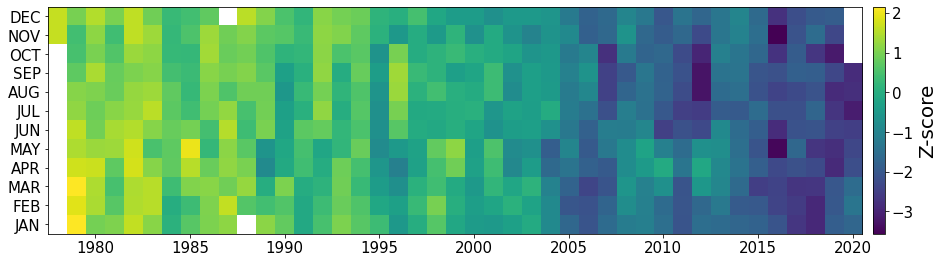

In [11]:
# Prepare inputs
x = df_stdanom.index.values
y = np.linspace(1,12,12).astype(int)
z = df_stdanom.values.T

print(x.shape, y.shape, z.shape)

# Create plot
fig, ax = plt.subplots(figsize=(15, 12))
ax = apbplt.hovmoller(x, y, z, ax=ax, add_colorbar=True, units='Z-score', aspect=1.)